In [1]:
import sys
sys.path.append('..')

In [2]:
from utils.intermediate_layer_extraction import return_layer_input
import torch.nn.functional as F
import deepmatcher as dm
import torch
import pandas as pd

In [49]:
def aggregateRi(ri_list,samples,attributes,matching):
    aggregation = []
    attribute_len = int(len(list(samples.values())[0])/len(attributes))
    for sample_id in samples.keys():
        curr_aggregate = []
        for idx,_ in enumerate(attributes):
            start_idx = idx*attribute_len
            end_idx = start_idx+attribute_len
            curr_ri = ri_list[sample_id][idx]
            perturbation_measure = F.cosine_similarity(samples[sample_id][start_idx:end_idx]
                                                                          ,(samples[sample_id]+curr_ri)[start_idx:end_idx],
                                                       dim=0)
            curr_aggregate.append(perturbation_measure.item())
        aggregation.append(curr_aggregate)
    df = pd.DataFrame(data=aggregation,columns=attributes)
    if matching:
        df.mean().plot.bar(color='green')
    else:
        df.mean().plot.bar(color='red')

In [4]:
w_model = dm.MatchingModel(attr_summarizer='hybrid')
w_model.load_state('../models/walmartamazon_hybrid.pth')
w_model = w_model.to('cuda')

In [5]:
testneg_w = return_layer_input(w_model,w_model.classifier,'../datasets/Structured/Walmart-Amazon',
                              'test_negatives',0)

In [6]:
testneg_ri_w = torch.load('WalmartAmazon/experiment_results/testneg_ri_hybrid.pt')

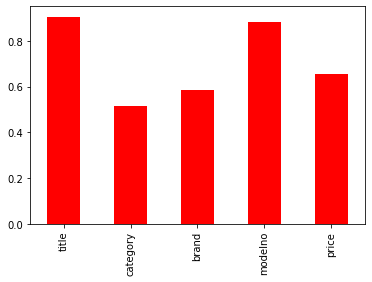

In [44]:
attributes = ['title','category','brand','modelno','price']
aggregateRi(testneg_ri_w,testneg_w,attributes)

In [46]:
testpos_w = return_layer_input(w_model,w_model.classifier,'../datasets/Structured/Walmart-Amazon',
                              'test_positives',1)
testpos_ri_w = torch.load('WalmartAmazon/experiment_results/testpos_ri_hybrid.pt')

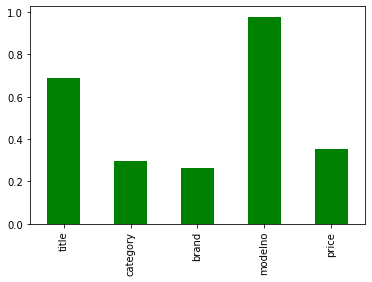

In [51]:
aggregateRi(testpos_ri_w,testpos_w,attributes,matching=True)

## DBLP-ACM

In [66]:
da_model = dm.MatchingModel(attr_summarizer='hybrid')
da_model.load_state('../models/dblp_acm_hybrid2.pth')
da_model = da_model.to('cuda')

In [67]:
testneg_da = return_layer_input(da_model,da_model.classifier,'../datasets/Structured/DBLP-ACM',
                              'test_negatives',0)

In [68]:
testneg_ri_da = torch.load('DBLP-ACM/experiment_results/testneg_ri_hybrid.pt')

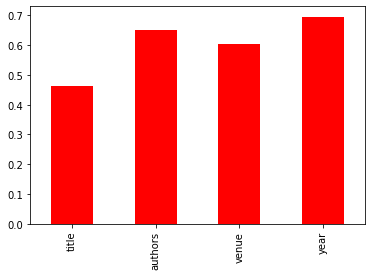

In [69]:
attributes = ['title','authors','venue','year']
aggregateRi(testneg_ri_da,testneg_da,attributes,matching=False)

In [70]:
testpos_da = return_layer_input(da_model,da_model.classifier,'../datasets/Structured/DBLP-ACM',
                              'test_positives',1)

In [71]:
testpos_ri_da = torch.load('DBLP-ACM/experiment_results/testpos_ri_hybrid.pt')

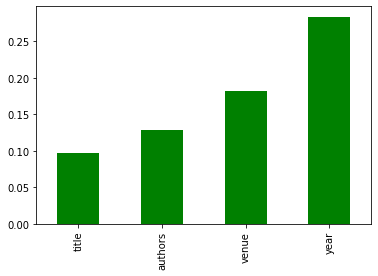

In [72]:
aggregateRi(testpos_ri_da,testpos_da,attributes,matching=True)

## Amazon-Google

In [73]:
g_model = dm.MatchingModel(attr_summarizer='hybrid')
g_model.load_state('../models/amazongoogle_hybrid.pth')
g_model = g_model.to('cuda')

In [74]:
testneg_g = return_layer_input(g_model,g_model.classifier,'../datasets/Structured/Amazon-Google/',
                              'test_negatives',0)

In [75]:
testneg_ri_g = torch.load('Amazon-Google/experiment_results/testneg_ri_hybrid.pt')

In [76]:
aggregateRi(testneg_ri_g,testneg_g,attributes,matching=False)

KeyError: 9167

In [78]:
testneg_ri_g[9167]

KeyError: 9167